## Librerías

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de Datos

In [2]:
portfolio = pd.read_json('./portfolio.json', orient='records', lines=True)
profile = pd.read_json('./profile.json', orient='records', lines=True)
trx = pd.read_json('./transcript.json', orient='records', lines=True)

#No solo podemos trabajar con csv, los archivos deben estar dentro de una carpeta llamada starbucks y el script fuera de ella.

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

#### Instrucciones: Dado el conjunto de datos, realiza las tareas que se te piden. Los equipos serán los mismos de la última ocasión.

1) Haz una exploración inicial de todos los DataFrame. ¿Qué hallazgos puede indicar? (1 punto)

2) Analiza los outliers de cada una de las tablas. Recuerda que el contexto es fundamental. Toma decisiones acerca de ellos, para este punto apóyate de gráficos de bigote, histogramas, uso de percentiles o bien de los bigotes. Explica la decisión que tomarás. (1 punto)

3) Explora `offer_type` dentro de `portafolio`. ¿Qué encuentras? (1 punto)

4) Transforma `became_member_on` a fecha. ¿Quién es el miembro más antiguo? ¿Tiene sentido? ¿Quién es el más actual según los registros? Hint: ajusta el parámetro format según corresponda. (1 punto)

5) En `trx` nos enfocamos en `event`, filtrando solo `transaction`. Puedes incluso construir una tabla auxiliar, llámala transacciones. Realiza limpieza para obtener los montos. ¿Por qué aparecerían más tipos de evento y todos encerrados en {}? Hint: puedes usar `.map(lambda x:x['amount'])`. Sin embargo, si decides hacerlo, explica por qué funciona (Revise: https://docs.python.org/3/tutorial/datastructures.html apartado 5.5 Dictionaries). ¿Tienes otra manera de limpiar? (1 punto)

6) Genera las siguientes estadísticas, dada la tabla transacciones: min, max, mean, count, sum para el `monto`; y el promedio para `time`. Deben ser calculadas a nivel de persona. Para eliminar los índices adicionales que surgen de esta forma, puedes usar este fragmento de código (siempre y cuando transactions ya sea la agregación): (2 puntos)
   
   `transactions.columns = ["_".join(x) for x in transactions.columns]`
   
   `transactions.reset_index(drop = False, inplace=True)`
   ¿Nota como se arreglaron los índices?
   
7) Haga el merge de `profile[['age', 'income', 'id']]` con `transactions`, Hint: Recuerde que en el caso de no contar con los mismos nombres en las llaves deberá emplear: `left_on` y `right_on`, ¿Qué valor usará en `how`? ¿Por qué? Esa última será su TAD. (1 punto)
8) Haga una revisión final de las columnas que obtuvo. Apóyese de diagramas de dispersión, matriz de correlación y otros gráficos que puedan describir su TAD. ¿Qué hallazgos encuetra? (2 puntos)

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
trx

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [6]:
portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [7]:
trx.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [8]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [9]:
profile['gender'].value_counts(dropna = False)

gender
M       8484
F       6129
None    2175
O        212
Name: count, dtype: int64

In [10]:
profile[profile['gender'].isnull()]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [11]:
profile_wna = profile.dropna(subset=['gender']).copy()

In [12]:
profile_wna

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [13]:
profile_wna.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [17]:
profile['age'].quantile([0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.995])


0.005     19.0
0.050     24.0
0.100     30.0
0.200     41.0
0.300     49.0
0.400     54.0
0.500     58.0
0.600     63.0
0.700     69.0
0.800     78.0
0.900    118.0
0.950    118.0
0.995    118.0
Name: age, dtype: float64

<Axes: >

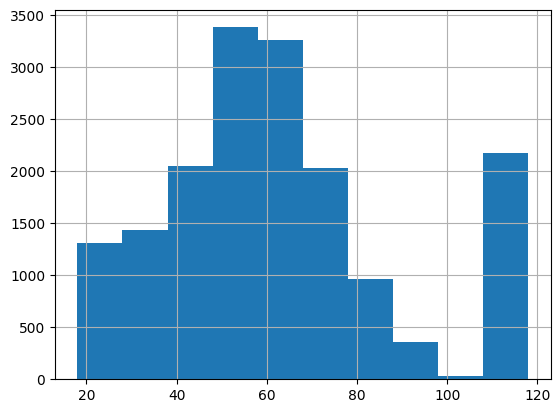

In [14]:
profile['age'].hist()

<Axes: >

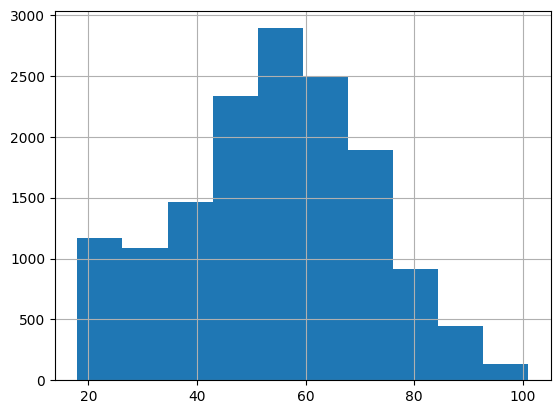

In [15]:
profile_wna['age'].hist()

In [18]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [21]:
profile_wna['became_member_on'] = pd.to_datetime(profile_wna['became_member_on'],format = '%Y%m%d')

In [22]:
profile_wna

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [23]:
profile_wna['became_member_on'].agg(['min','max'])

min   2013-07-29
max   2018-07-26
Name: became_member_on, dtype: datetime64[ns]

In [24]:
profile_wna[profile_wna['became_member_on']=='2013-07-29']

,gender,age,id,became_member_on,income
8948,M,64,77388a70eaf14433b4efc5d01fa947bf,2013-07-29,69000.0


In [25]:
profile_wna[profile_wna['became_member_on']=='2018-07-26']

,gender,age,id,became_member_on,income
167,M,85,4e233f02eff840c7a3e5ec15d55d7d23,2018-07-26,67000.0
452,M,63,b65eaba56d124588aed15c484db427a8,2018-07-26,78000.0
689,M,47,70f115dc7bf84a2ca3b1481639590f2b,2018-07-26,53000.0
1517,M,28,267e47de94fd46b1afa96dea1c9d3cbf,2018-07-26,33000.0
2709,M,43,4be45187b24d479fbccaf1f6293ebff8,2018-07-26,54000.0
4357,M,76,6597e5ab63754726b83ba2032f008d26,2018-07-26,92000.0
6524,M,36,c3ea4f8ef00d4ec99de9df2de9b4e794,2018-07-26,33000.0
8079,M,82,039e0c539c2f4fc582423412a8bceb40,2018-07-26,32000.0
8152,F,48,fb75504a0e404549995a3e8427a2a252,2018-07-26,64000.0
10282,M,46,e4989ca3d8974e28a3fe87aa0b0ce327,2018-07-26,74000.0


In [26]:
transacciones = trx[trx['event']=='transaction']

In [27]:
transacciones

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [28]:
transacciones['value'] = transacciones['value'].map(lambda x:x['amount'] if isinstance(x, dict) else None)

/tmp/ipykernel_6519/1272702520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacciones['value'] = transacciones['value'].map(lambda x:x['amount'] if isinstance(x, dict) else None)


In [29]:
transacciones.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [30]:
trx.loc[trx['event'] == 'transaction', 'value'] = transacciones['value']

In [31]:
trx

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714
306531,a00058cf10334a308c68e7631c529907,transaction,3.61,714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.53,714


In [32]:
transacciones

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0
12659,54890f68699049c2a04d415abc25e717,transaction,13.23,0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714
306531,a00058cf10334a308c68e7631c529907,transaction,3.61,714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.53,714


In [33]:
aux_transacciones = transacciones.groupby('person').agg(value_min=('value', 'min'),
    value_max=('value', 'max'),
    value_mean=('value', 'mean'),
    value_count=('value', 'count'),
    value_sum=('value', 'sum'),
    time_mean=('time', 'mean')
).reset_index()

In [34]:
aux_transacciones

,person,value_min,value_max,value_mean,value_count,value_sum,time_mean
0,0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,127.60,543.00
1,00116118485d4dfda04fdbaba9a87b5c,0.20,3.19,1.363333,3,4.09,408.00
2,0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,79.46,451.20
3,0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,196.86,348.75
4,0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,154.05,375.00
...,...,...,...,...,...,...,...
16573,fff3ba4757bd42088c044ca26d73817a,10.99,388.22,52.816364,11,580.98,246.00
16574,fff7576017104bcc8677a8d63322b5e1,2.08,8.01,4.990000,6,29.94,392.00
16575,fff8957ea8b240a6b5e634b6ee8eafcf,0.64,6.39,2.430000,5,12.15,379.20
16576,fffad4f4828548d1b5583907f2e9906b,2.05,12.18,7.402500,12,88.83,323.50


In [44]:
len(aux_transacciones['person'].unique())

16578

In [46]:
len(profile_wna['id'].unique())

14825

In [47]:
merge = pd.merge(aux_transacciones,profile_wna[['age','income','id']],left_on='person', right_on='id',how='inner')

In [48]:
merge

,person,value_min,value_max,value_mean,value_count,value_sum,time_mean,age,income,id
0,0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,127.60,543.000000,33,72000.0,0009655768c64bdeb2e877511632db8f
1,0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,79.46,451.200000,40,57000.0,0011e0d4e6b944f998e987f904e8c1e5
2,0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,196.86,348.750000,59,90000.0,0020c2b971eb4e9188eac86d93036a77
3,0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,154.05,375.000000,24,60000.0,0020ccbbb6d84e358d3414a3ff76cffd
4,003d66b6608740288d6cc97a6903f4f0,0.44,7.41,2.685556,18,48.34,421.666667,26,73000.0,003d66b6608740288d6cc97a6903f4f0
...,...,...,...,...,...,...,...,...,...,...
14487,fff3ba4757bd42088c044ca26d73817a,10.99,388.22,52.816364,11,580.98,246.000000,69,83000.0,fff3ba4757bd42088c044ca26d73817a
14488,fff7576017104bcc8677a8d63322b5e1,2.08,8.01,4.990000,6,29.94,392.000000,71,73000.0,fff7576017104bcc8677a8d63322b5e1
14489,fff8957ea8b240a6b5e634b6ee8eafcf,0.64,6.39,2.430000,5,12.15,379.200000,71,56000.0,fff8957ea8b240a6b5e634b6ee8eafcf
14490,fffad4f4828548d1b5583907f2e9906b,2.05,12.18,7.402500,12,88.83,323.500000,34,34000.0,fffad4f4828548d1b5583907f2e9906b


In [49]:
merge.isnull().sum()

person         0
value_min      0
value_max      0
value_mean     0
value_count    0
value_sum      0
time_mean      0
age            0
income         0
id             0
dtype: int64

In [52]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14492 entries, 0 to 14491
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   person       14492 non-null  object 
 1   value_min    14492 non-null  float64
 2   value_max    14492 non-null  float64
 3   value_mean   14492 non-null  float64
 4   value_count  14492 non-null  int64  
 5   value_sum    14492 non-null  float64
 6   time_mean    14492 non-null  float64
 7   age          14492 non-null  int64  
 8   income       14492 non-null  float64
 9   id           14492 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


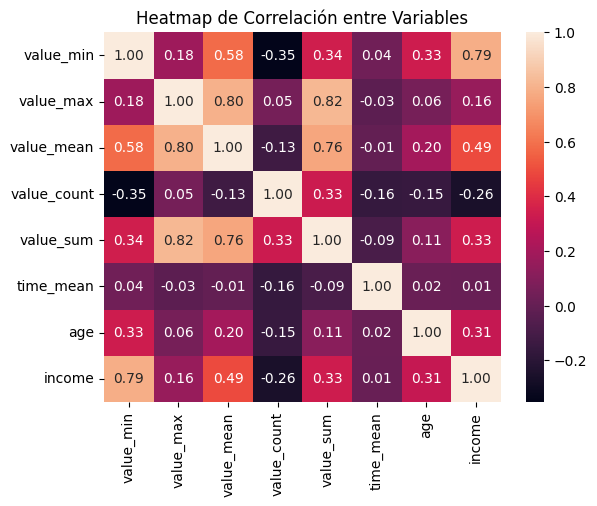

In [55]:
var_num=['value_min', 'value_max', 'value_mean', 'value_count', 'value_sum','time_mean','age','income']
sns.heatmap(merge[var_num].corr(), annot=True, fmt='.2f')
plt.title('Heatmap de Correlación entre Variables')

plt.show()

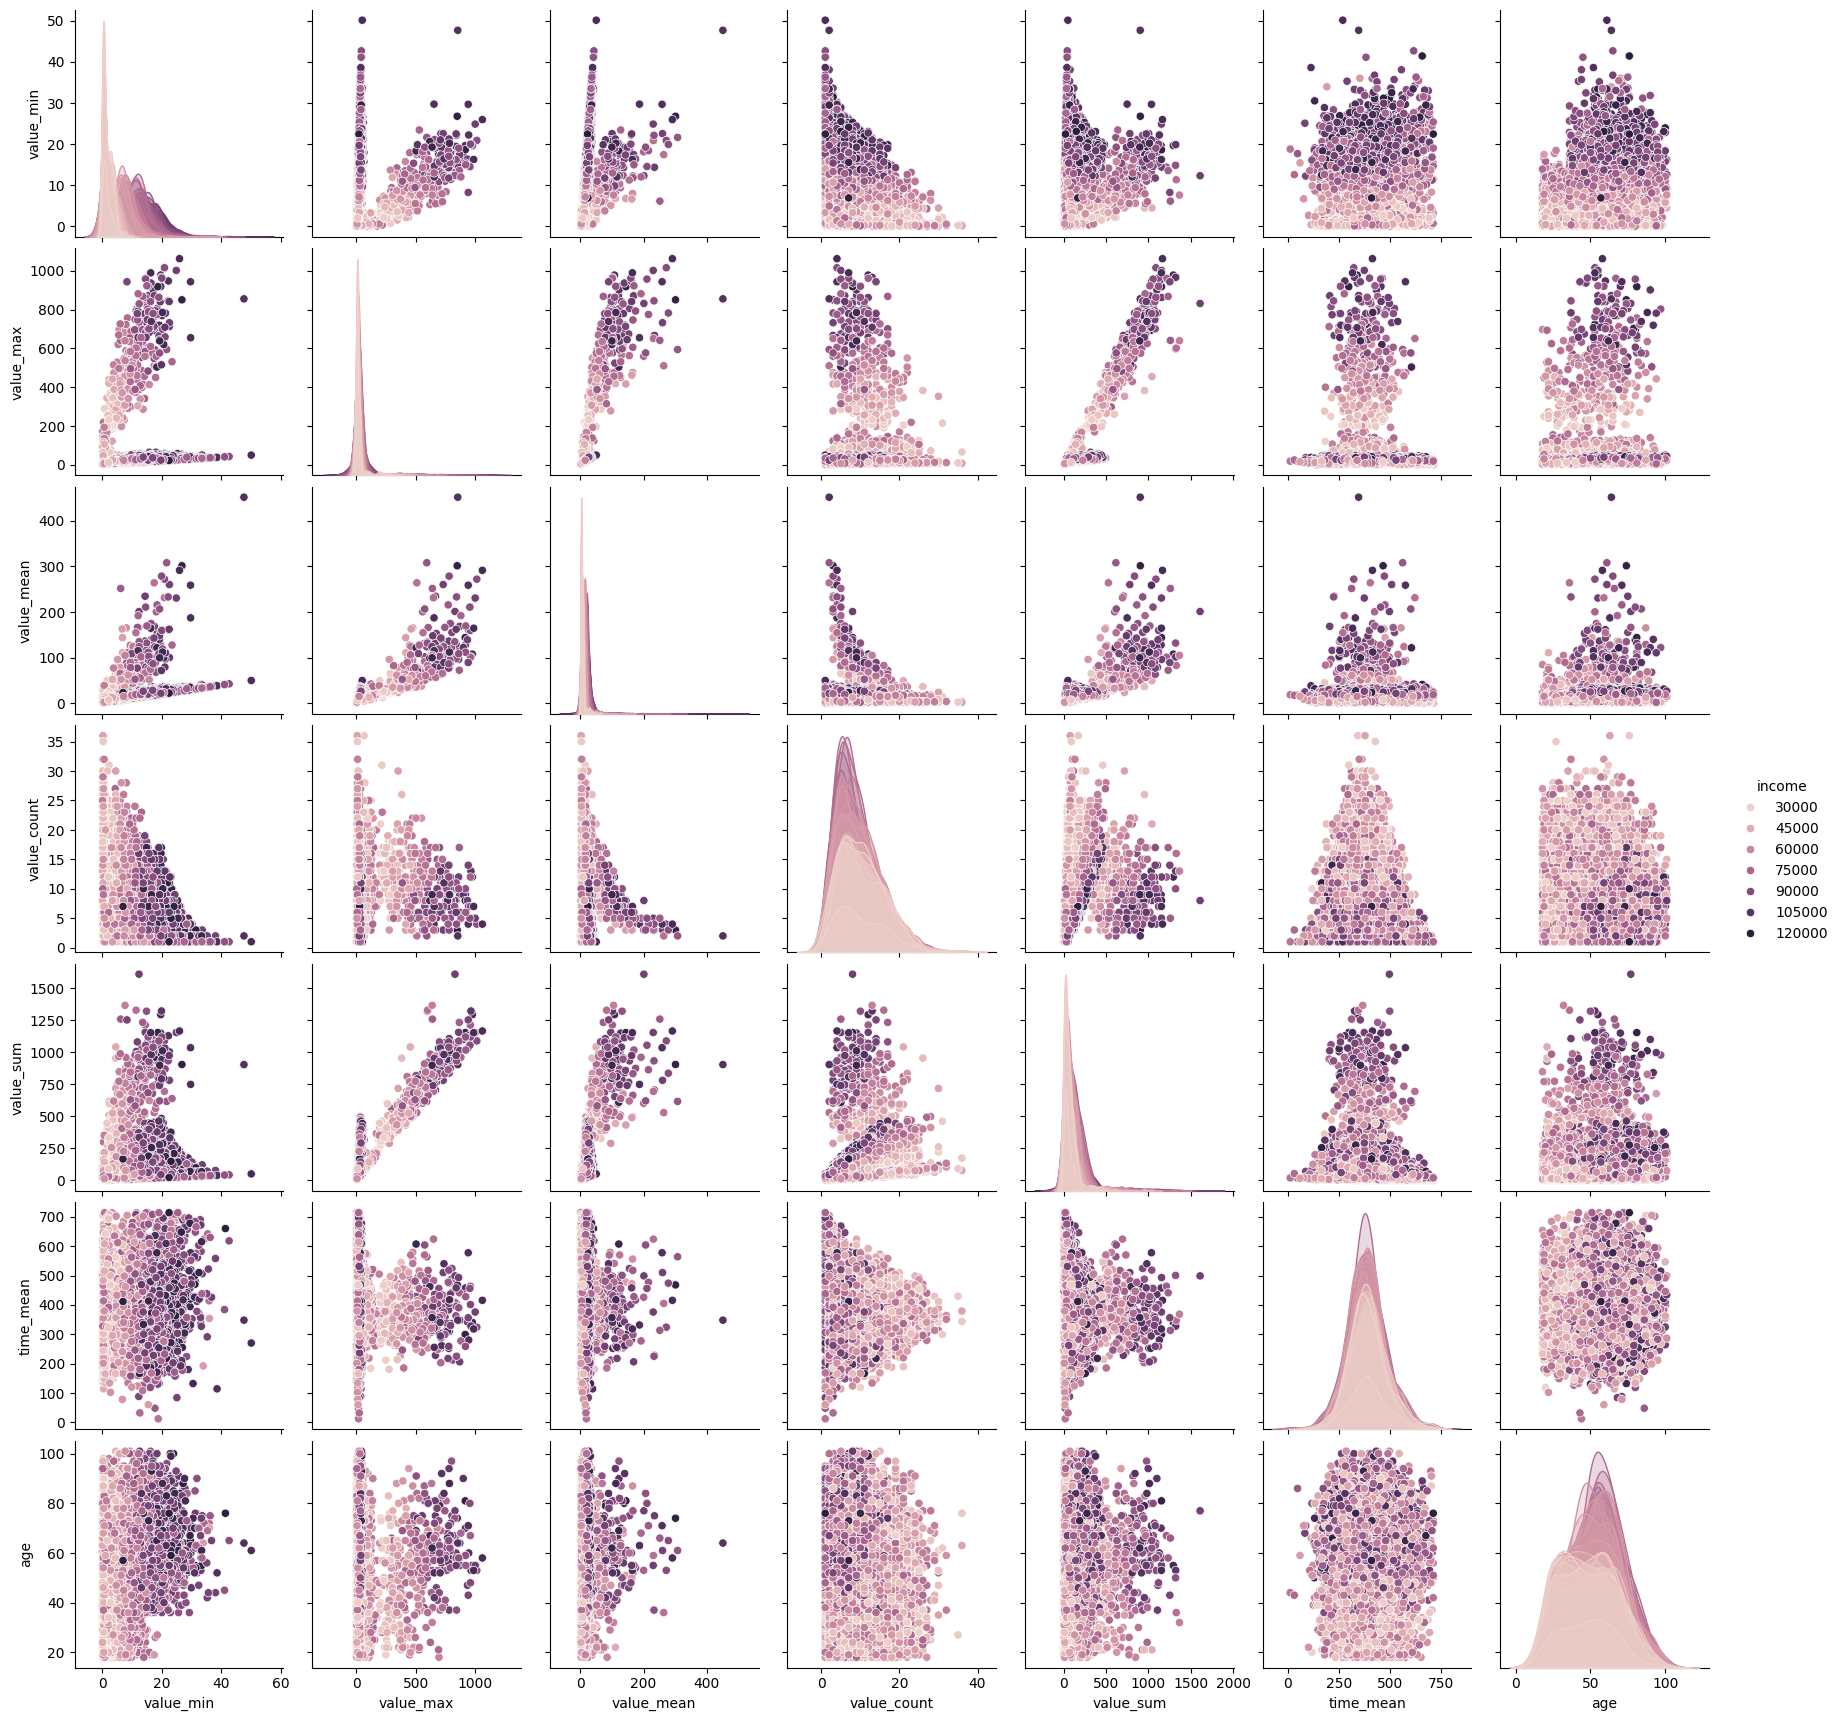

In [62]:
sns.pairplot(merge[var_num], corner=False, diag_kind='kde',hue='income') 